# Overview
### Section 1 of Overview
### Section 2 of Overview
### Section 3 of Overview

## Loading in & Investigating Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd

# Loading in the CSV file 
file_path = 'archive/HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Checking the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)  

# Displaying the head
df.head()


Shape of the DataFrame: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
# Checking column names and null count
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [20]:
# Calculate the value counts for the Attrition column
attrition_counts = df['Attrition'].value_counts()

# Calculate the percentages
attrition_percentages = df['Attrition'].value_counts(normalize=True) * 100

# Print the counts and percentages
print("Attrition Counts:\n", attrition_counts)
print("\nAttrition Percentages:\n", attrition_percentages)

Attrition Counts:
 No     1233
Yes     237
Name: Attrition, dtype: int64

Attrition Percentages:
 No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


## Creating Logistic Regression Model

In [21]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Perform the stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in the training set
train_distribution = y_train.value_counts(normalize=True) * 100
print("Training Set Distribution:\n", train_distribution)

# Check the distribution in the test set
test_distribution = y_test.value_counts(normalize=True) * 100
print("\nTest Set Distribution:\n", test_distribution)


Training Set Distribution:
 No     83.843537
Yes    16.156463
Name: Attrition, dtype: float64

Test Set Distribution:
 No     84.013605
Yes    15.986395
Name: Attrition, dtype: float64


In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Gender']

# OneHotEncoder for categorical variables
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(X_train[categorical_cols])

# Transform the training and test sets
X_train_encoded = ohe.transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

# Create DataFrames for the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names(categorical_cols))

# Drop the original categorical columns and concatenate the encoded DataFrames
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Ensure the same columns in both train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Label encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train.shape, X_test.shape)


(1176, 47) (294, 47)


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(1176, 47) (294, 47)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
baseline_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = baseline_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8605442176870748
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
 [[237  10]
 [ 31  16]]


## Investigating Different Parameters for New Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def train_and_evaluate(X_train, y_train, X_test, y_test, class_weight=None, use_smote=False, solver='lbfgs', penalty='l2', C=1.0):
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    
    model = LogisticRegression(random_state=42, class_weight=class_weight, solver=solver, penalty=penalty, C=C, max_iter=1000)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    y_score = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    return accuracy, report, confusion, fpr, tpr, roc_auc


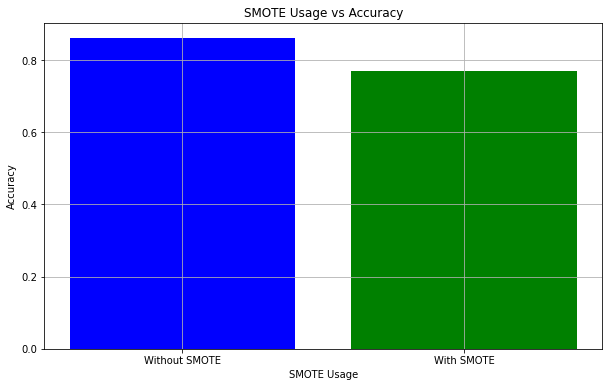

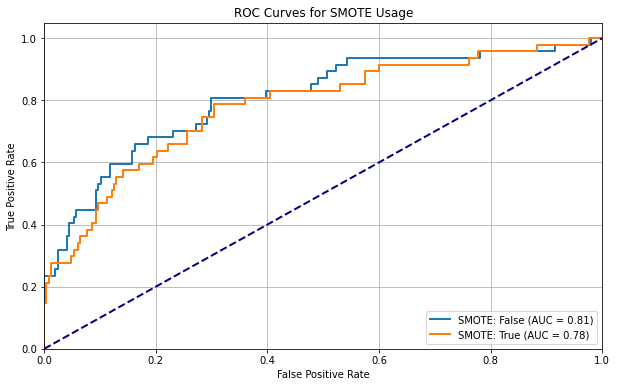

In [27]:
smote_results = []

# Using SMOTE and without SMOTE
for use_smote in [False, True]:
    accuracy, report, confusion, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, use_smote=use_smote)
    smote_results.append({'use_smote': use_smote, 'accuracy': accuracy, 'report': report, 'confusion': confusion, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc})

# Visualize SMOTE results
smote_labels = ['Without SMOTE', 'With SMOTE']
smote_accuracies = [result['accuracy'] for result in smote_results]
plt.figure(figsize=(10, 6))
plt.bar(smote_labels, smote_accuracies, color=['blue', 'green'])
plt.xlabel('SMOTE Usage')
plt.ylabel('Accuracy')
plt.title('SMOTE Usage vs Accuracy')
plt.grid(True)
plt.show()

# Plot ROC curves for SMOTE results
plt.figure(figsize=(10, 6))
for result in smote_results:
    plt.plot(result['fpr'], result['tpr'], lw=2, label='SMOTE: {} (AUC = {:.2f})'.format(result['use_smote'], result['roc_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SMOTE Usage')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


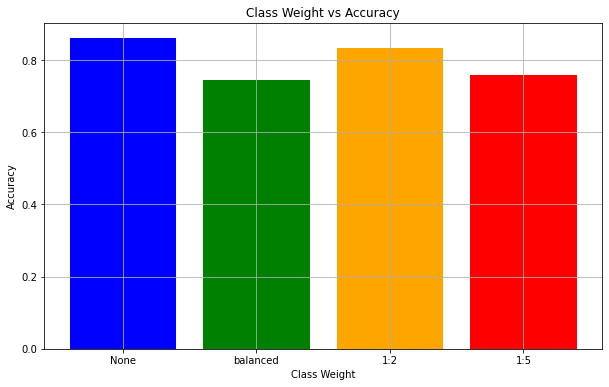

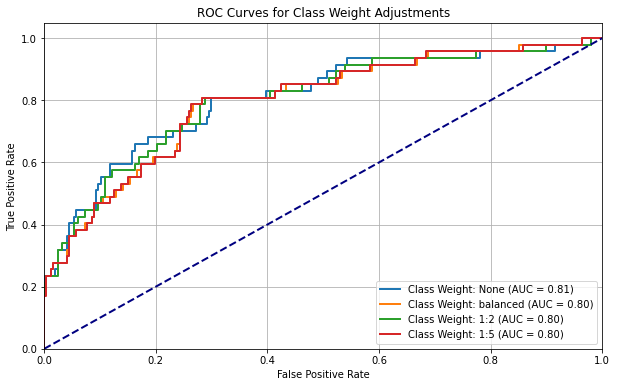

In [28]:
class_weights = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}]
class_weight_results = []

for weight in class_weights:
    accuracy, report, confusion, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, class_weight=weight)
    class_weight_results.append({'class_weight': weight, 'accuracy': accuracy, 'report': report, 'confusion': confusion, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc})

# Visualize Class Weight results
class_weight_labels = ['None', 'balanced', '1:2', '1:5']
class_weight_accuracies = [result['accuracy'] for result in class_weight_results]
plt.figure(figsize=(10, 6))
plt.bar(class_weight_labels, class_weight_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.title('Class Weight vs Accuracy')
plt.grid(True)
plt.show()

# Plot ROC curves for Class Weight results
plt.figure(figsize=(10, 6))
for result in class_weight_results:
    label = 'balanced' if result['class_weight'] == 'balanced' else 'None' if result['class_weight'] is None else '1:{}'.format(result['class_weight'][1])
    plt.plot(result['fpr'], result['tpr'], lw=2, label='Class Weight: {} (AUC = {:.2f})'.format(label, result['roc_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Class Weight Adjustments')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


C:\Users\agamb\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


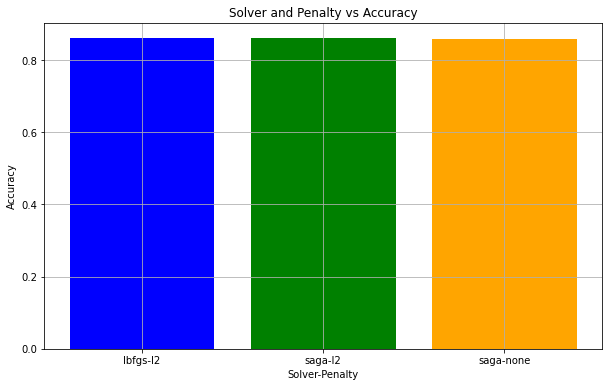

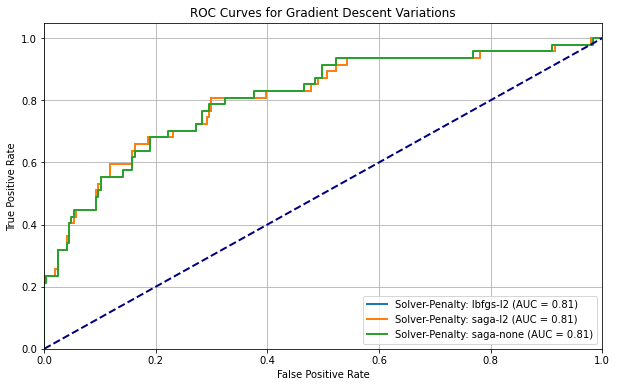

In [29]:
solvers = ['lbfgs', 'saga']
penalties = ['l2', 'none']
gradient_descent_results = []

for solver in solvers:
    for penalty in penalties:
        if solver == 'lbfgs' and penalty == 'none':
            continue  # lbfgs does not support 'none' penalty
        accuracy, report, confusion, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, solver=solver, penalty=penalty)
        gradient_descent_results.append({'solver': solver, 'penalty': penalty, 'accuracy': accuracy, 'report': report, 'confusion': confusion, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc})

# Visualize Gradient Descent results
solver_penalty_labels = [f'{result["solver"]}-{result["penalty"]}' for result in gradient_descent_results]
gradient_descent_accuracies = [result['accuracy'] for result in gradient_descent_results]
plt.figure(figsize=(10, 6))
plt.bar(solver_penalty_labels, gradient_descent_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Solver-Penalty')
plt.ylabel('Accuracy')
plt.title('Solver and Penalty vs Accuracy')
plt.grid(True)
plt.show()

# Plot ROC curves for Gradient Descent results
plt.figure(figsize=(10, 6))
for result in gradient_descent_results:
    plt.plot(result['fpr'], result['tpr'], lw=2, label='Solver-Penalty: {} (AUC = {:.2f})'.format(result["solver"] + '-' + result["penalty"], result['roc_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Gradient Descent Variations')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [30]:
# Find the best parameters for SMOTE
best_smote_result = max(smote_results, key=lambda x: x['roc_auc'])

smote_text = "with SMOTE" if best_smote_result['use_smote'] else "without SMOTE"

print(f"The best model {smote_text} achieved an AUC of {best_smote_result['roc_auc']:.2f} and an accuracy of {best_smote_result['accuracy']:.2f}.")

# Find the best parameters for Class Weight
best_class_weight_result = max(class_weight_results, key=lambda x: x['roc_auc'])

if best_class_weight_result['class_weight'] is None:
    class_weight_text = "without class weight adjustment"
elif best_class_weight_result['class_weight'] == 'balanced':
    class_weight_text = "with balanced class weight"
else:
    class_weight_text = f"with class weight 1:{best_class_weight_result['class_weight'][1]}"

print(f"The best model {class_weight_text} achieved an AUC of {best_class_weight_result['roc_auc']:.2f} and an accuracy of {best_class_weight_result['accuracy']:.2f}.")

# Find the best parameters for Gradient Descent
best_gradient_descent_result = max(gradient_descent_results, key=lambda x: x['roc_auc'])

solver = best_gradient_descent_result['solver']
penalty = best_gradient_descent_result['penalty']

print(f"The best model using {solver} solver and {penalty} penalty achieved an AUC of {best_gradient_descent_result['roc_auc']:.2f} and an accuracy of {best_gradient_descent_result['accuracy']:.2f}.")


The best model without SMOTE achieved an AUC of 0.81 and an accuracy of 0.86.
The best model without class weight adjustment achieved an AUC of 0.81 and an accuracy of 0.86.
The best model using lbfgs solver and l2 penalty achieved an AUC of 0.81 and an accuracy of 0.86.


In [35]:
# Reduced degree range to 1-4
degrees = list(range(1, 5))  # Degrees from 1 to 4

# Function to train and evaluate with polynomial features
def train_evaluate_poly(X_train, y_train, degree, solver='lbfgs', penalty='l2', C=1.0):
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    model = LogisticRegression(random_state=42, solver=solver, penalty=penalty, C=C, max_iter=1000)
    cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='roc_auc')
    return cv_scores.mean(), cv_scores.std()

# Iterate through polynomial degrees
poly_results = []

for degree in degrees:
    mean_auc, std_auc = train_evaluate_poly(X_train_scaled, y_train, degree)
    poly_results.append({'degree': degree, 'mean_auc': mean_auc, 'std_auc': std_auc})

# Print the results
for result in poly_results:
    print(f"Degree: {result['degree']} - Mean AUC: {result['mean_auc']:.4f} - Std AUC: {result['std_auc']:.4f}")


Degree: 1 - Mean AUC: 0.8343 - Std AUC: 0.0554
Degree: 2 - Mean AUC: 0.7149 - Std AUC: 0.0655
Degree: 3 - Mean AUC: 0.7690 - Std AUC: 0.0514
Degree: 4 - Mean AUC: 0.7066 - Std AUC: 0.0369


## Comparing Baseline and Regularized Logistic Regression Models

Baseline Model with Cross-Validation
Cross-validation scores: [0.72634237 0.87389794 0.84931873 0.84504408 0.87670318]
Mean AUC: 0.8343
Standard Deviation AUC: 0.0554
Accuracy: 0.8605442176870748
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
[[237  10]
 [ 31  16]]


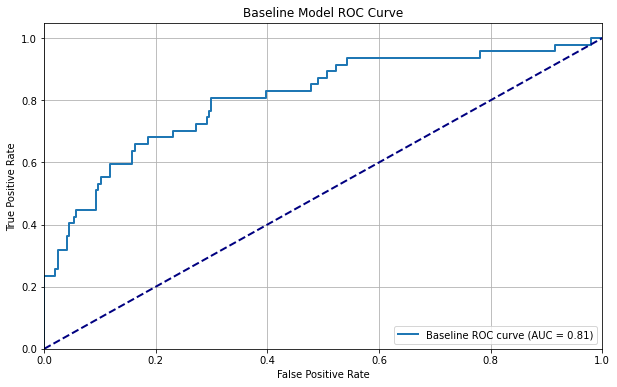

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the baseline logistic regression model
baseline_model = LogisticRegression(random_state=42)

# Perform cross-validation on the baseline model
cv_scores_baseline = cross_val_score(baseline_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Fit the baseline model on the full training data and evaluate on the test set
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)
confusion_baseline = confusion_matrix(y_test, y_pred_baseline)
y_score_baseline = baseline_model.decision_function(X_test_scaled)
fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_score_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

print("Baseline Model with Cross-Validation")
print(f"Cross-validation scores: {cv_scores_baseline}")
print(f"Mean AUC: {cv_scores_baseline.mean():.4f}")
print(f"Standard Deviation AUC: {cv_scores_baseline.std():.4f}")
print(f"Accuracy: {accuracy_baseline}")
print(f"Classification Report:\n{report_baseline}")
print(f"Confusion Matrix:\n{confusion_baseline}")

# Plot ROC Curve for the baseline model
plt.figure(figsize=(10, 6))
plt.plot(fpr_baseline, tpr_baseline, lw=2, label='Baseline ROC curve (AUC = {:.2f})'.format(roc_auc_baseline))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Model ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Best Model with Cross-Validation
Cross-validation scores: [0.72634237 0.87389794 0.84931873 0.84504408 0.87670318]
Mean AUC: 0.8343
Standard Deviation AUC: 0.0554
Accuracy: 0.8605442176870748
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
[[237  10]
 [ 31  16]]


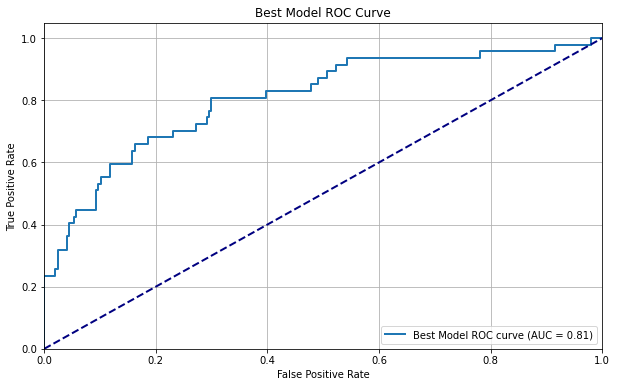

In [37]:
# Define the best logistic regression model with lbfgs solver and l2 penalty
best_model = LogisticRegression(random_state=42, solver='lbfgs', penalty='l2', C=1.0, max_iter=1000)

# Perform cross-validation on the best model
cv_scores_best = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Fit the best model on the full training data and evaluate on the test set
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
y_score_best = best_model.decision_function(X_test_scaled)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_score_best)
roc_auc_best = auc(fpr_best, tpr_best)

print("Best Model with Cross-Validation")
print(f"Cross-validation scores: {cv_scores_best}")
print(f"Mean AUC: {cv_scores_best.mean():.4f}")
print(f"Standard Deviation AUC: {cv_scores_best.std():.4f}")
print(f"Accuracy: {accuracy_best}")
print(f"Classification Report:\n{report_best}")
print(f"Confusion Matrix:\n{confusion_best}")

# Plot ROC Curve for the best model
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, lw=2, label='Best Model ROC curve (AUC = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Model ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Here I realized that both of my models are actually identical. Apparently the ideal parameters that I selected for my "best model" were the same as the default parameters. 